## loading libraries

In [35]:
library(dplyr)
library(doBy)
library(lubridate)
library(ggplot2)
library(Hmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




## Initial Setup
### Defining the function for concatenating data within a folder.

In [36]:
directory<-"/Users/jhosen/Library/CloudStorage/GoogleDrive-jakehosen@gmail.com/My Drive/WaterBear/CH4DHT22/20221109_pull/bin1/sensor_data"


concat_run<-function(directory){
    comp_data<-data.frame()
    wb_files<-list.files(path=paste(directory))
    wb_files<-wb_files[wb_files!="notes.txt"]
    for(j in 1:length(wb_files)){
        data<-read.csv(paste(directory,"/",wb_files[j],sep=""))
        data2<-subset(data,uuid!="debug")
        if(nrow(data2)>0){
            comp_data<-dplyr::bind_rows(comp_data,data2)
            }
    }
    return(comp_data)
}

### Importing the data from a single test run using the function.

In [37]:
comp_data0<-concat_run(directory)

## Adding time formats for human readable time and plotting.

In [38]:
comp_data<-subset(comp_data0,type!="debug")
comp_data$time_epoch<-as.character(comp_data$time.s)
comp_data$dtp<-lubridate::as_datetime(comp_data$time.s)


In [26]:
head(comp_data)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,atlas_CO2_ppm,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<drtn>
10,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948416,2022-11-08 23:00:15.534,1768,19.6,⋯,-1,1976,0,823,0,NA,NA,1667948415.534,2022-11-08 23:00:15,0 secs
18,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948418,2022-11-08 23:00:18.081,1646,19.6,⋯,-1,1976,0,797,0,NA,NA,1667948418.081,2022-11-08 23:00:18,0 secs
26,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948421,2022-11-08 23:00:20.620,1627,19.6,⋯,-1,1975,0,789,0,NA,NA,1667948420.62,2022-11-08 23:00:20,0 secs
34,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948423,2022-11-08 23:00:23.172,1626,19.6,⋯,-1,1975,0,791,0,NA,NA,1667948423.172,2022-11-08 23:00:23,0 secs
42,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948426,2022-11-08 23:00:25.730,1623,19.5,⋯,-1,1976,0,796,0,NA,NA,1667948425.73,2022-11-08 23:00:25,0 secs
50,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1667948428,2022-11-08 23:00:28.264,1624,19.5,⋯,-1,1976,0,806,0,NA,NA,1667948428.264,2022-11-08 23:00:28,0 secs


## Parses through the data and assigns a burst number and then counts each measurement in a burst.

In [41]:
comp_data$interval<-comp_data$time.s-Lag(comp_data$time.s,shift=1)

group<-1
burstcount<-1
comp_data$group<-1
comp_data$burstcount<-1
comp_rows<-nrow(comp_data)
for(i in 1:comp_rows){
    if(!is.na(comp_data$interval[i])){
    if(comp_data$interval[i]>30){
        group<-group+1
        burstcount<-1
        comp_data$group[i:comp_rows]<-group
        comp_data$burstcount[i]<-burstcount
        comp_data$burstcount[i]<-burstcount
            }else{
        comp_data$burstcount[i]<-burstcount
        burstcount<-burstcount+1
        }
        }
    }


In [42]:
tail(comp_data,n=50) 

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval,group,burstcount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<dbl>,<int>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>
255162,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029736,2022-11-09 21:35:36.012,1617,22.2,⋯,0,1383,0,NA,NA,1668029736.012,2022-11-09 21:35:36,2.552,1,31894
255170,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029739,2022-11-09 21:35:38.551,1615,22.2,⋯,0,1384,0,NA,NA,1668029738.551,2022-11-09 21:35:38,2.539,1,31895
255178,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029741,2022-11-09 21:35:41.102,1617,22.2,⋯,0,1383,0,NA,NA,1668029741.102,2022-11-09 21:35:41,2.551,1,31896
255186,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029744,2022-11-09 21:35:43.661,1619,22.2,⋯,0,1383,0,NA,NA,1668029743.661,2022-11-09 21:35:43,2.559,1,31897
255194,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029746,2022-11-09 21:35:46.201,1618,22.2,⋯,0,1383,0,NA,NA,1668029746.201,2022-11-09 21:35:46,2.540,1,31898
255202,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029749,2022-11-09 21:35:48.759,1619,22.2,⋯,0,1384,0,NA,NA,1668029748.759,2022-11-09 21:35:48,2.558,1,31899
255210,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029751,2022-11-09 21:35:51.311,1613,22.2,⋯,0,1385,0,NA,NA,1668029751.311,2022-11-09 21:35:51,2.552,1,31900
255218,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029754,2022-11-09 21:35:53.850,1618,22.2,⋯,0,1384,0,NA,NA,1668029753.85,2022-11-09 21:35:53,2.539,1,31901
255226,raw,bin,21003,wetlandBinTest-50FF6B068678545244122467-1667947649,1667947649,50FF6B068678545244122467,1668029756,2022-11-09 21:35:56.366,1616,22.2,⋯,0,1385,0,NA,NA,1668029756.366,2022-11-09 21:35:56,2.516,1,31902


In [30]:
comp_data_sum<-summaryBy(ch4_raw+ch4rf_raw~dtp,comp_data,FUN=c(sd,mean))

In [31]:
head(comp_data_sum)

,dtp,ch4_raw.sd,ch4rf_raw.sd,ch4_raw.mean,ch4rf_raw.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-11-08 23:00:15,NA,NA,823,1976
2,2022-11-08 23:00:18,NA,NA,797,1976
3,2022-11-08 23:00:20,NA,NA,789,1975
4,2022-11-08 23:00:23,NA,NA,791,1975
5,2022-11-08 23:00:25,NA,NA,796,1976
6,2022-11-08 23:00:28,NA,NA,806,1976


## Plotting average values per burst.

,dtp,ch4_raw.sd,ch4rf_raw.sd,ch4_raw.mean,ch4rf_raw.mean
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-11-08 23:00:15,NA,NA,823,1976
2,2022-11-08 23:00:18,NA,NA,797,1976
3,2022-11-08 23:00:20,NA,NA,789,1975
4,2022-11-08 23:00:23,NA,NA,791,1975
5,2022-11-08 23:00:25,NA,NA,796,1976
6,2022-11-08 23:00:28,NA,NA,806,1976


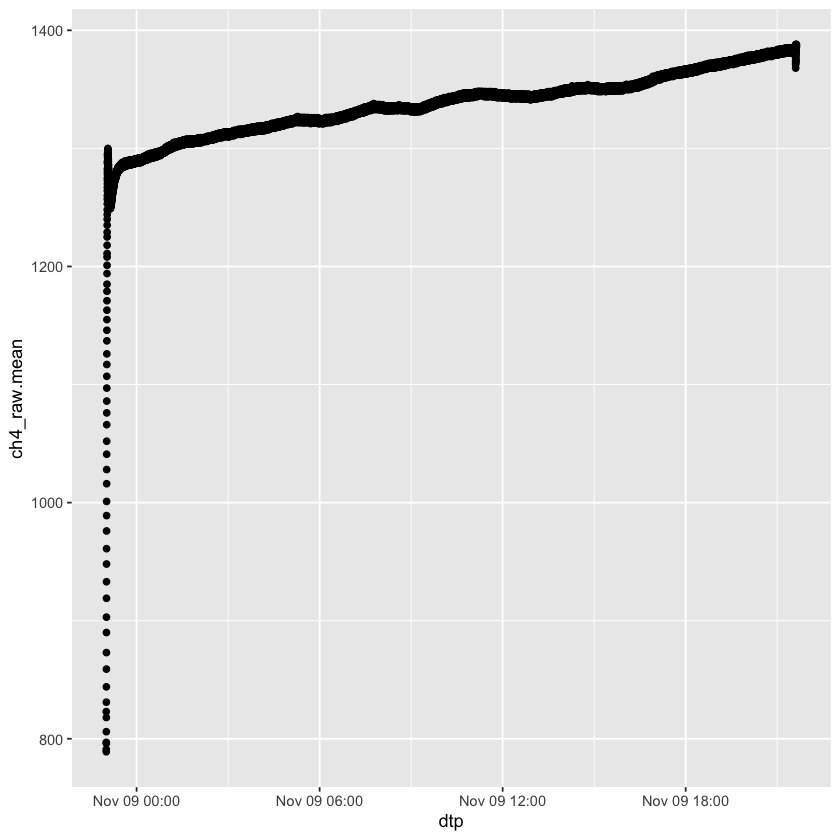

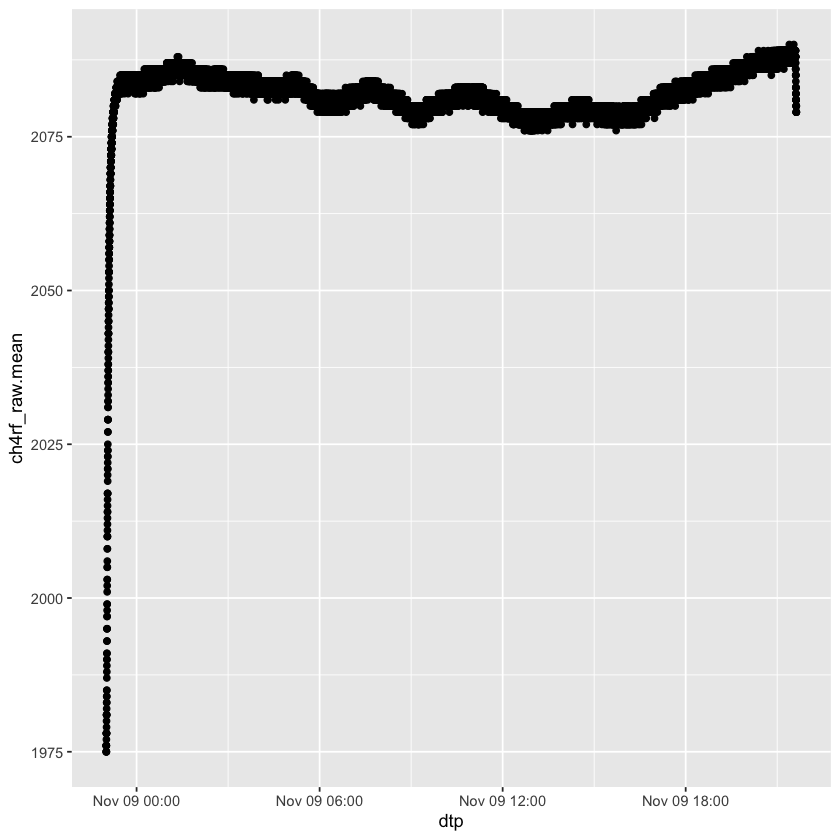

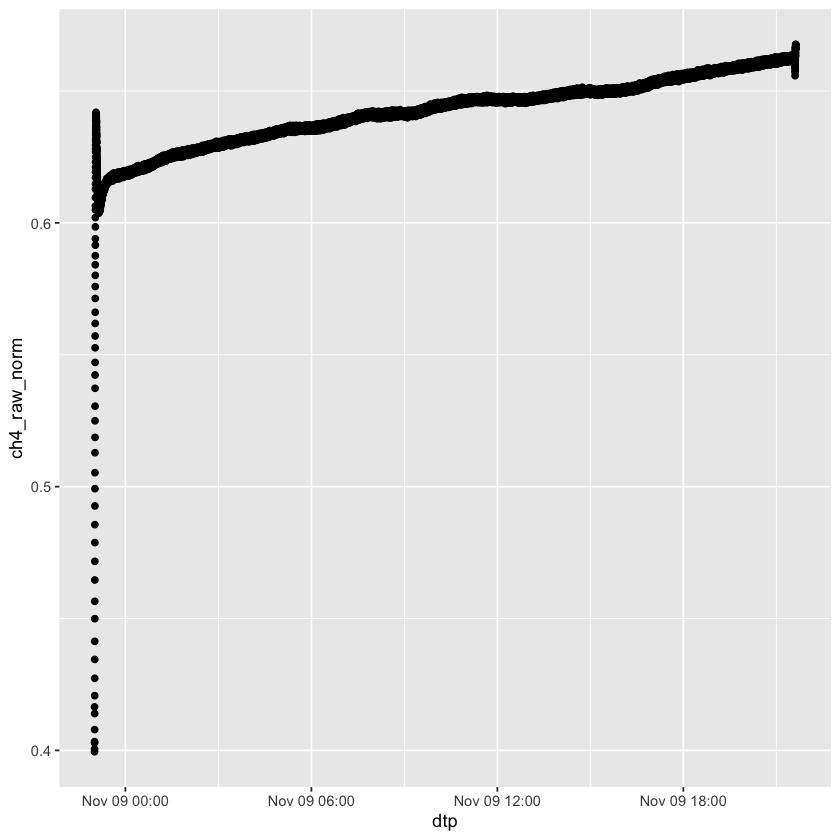

In [35]:
comp_data_sum$dtp<-as_datetime(comp_data_sum$dtp)

head(comp_data_sum)

ggplot(comp_data_sum,aes(dtp,ch4_raw.mean))+
geom_point()


ggplot(comp_data_sum,aes(dtp,ch4rf_raw.mean))+
geom_point()

comp_data_sum$ch4_raw_norm<-comp_data_sum$ch4_raw.mean/comp_data_sum$ch4rf_raw.mean

ggplot(comp_data_sum,aes(dtp,ch4_raw_norm))+
geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


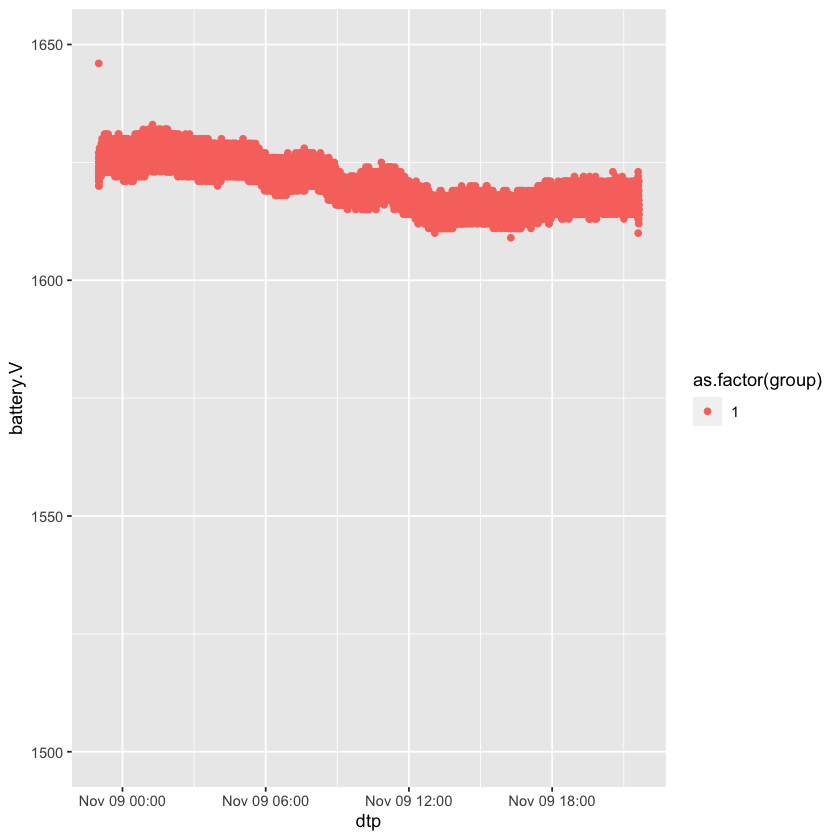

In [46]:
ggplot(subset(comp_data),aes(dtp,battery.V))+
    geom_point(aes(color=as.factor(group)))+
ylim(1500,1650)

In [27]:
names(comp_data)

[1] "type"          "site"          "logger"        "deployment"   
 [5] "deployed_at"   "uuid"          "time.s"        "time.h"       
 [9] "battery.V"     "dht_C"         "dht_RH"        "atlas_CO2_ppm"
[13] "ch4rf_raw"     "ch4rf_cal"     "ch4_raw"       "ch4_cal"      
[17] "user_note"     "user_value"    "time_epoch"    "dtp"          
[21] "interval"      "group"         "burstcount"

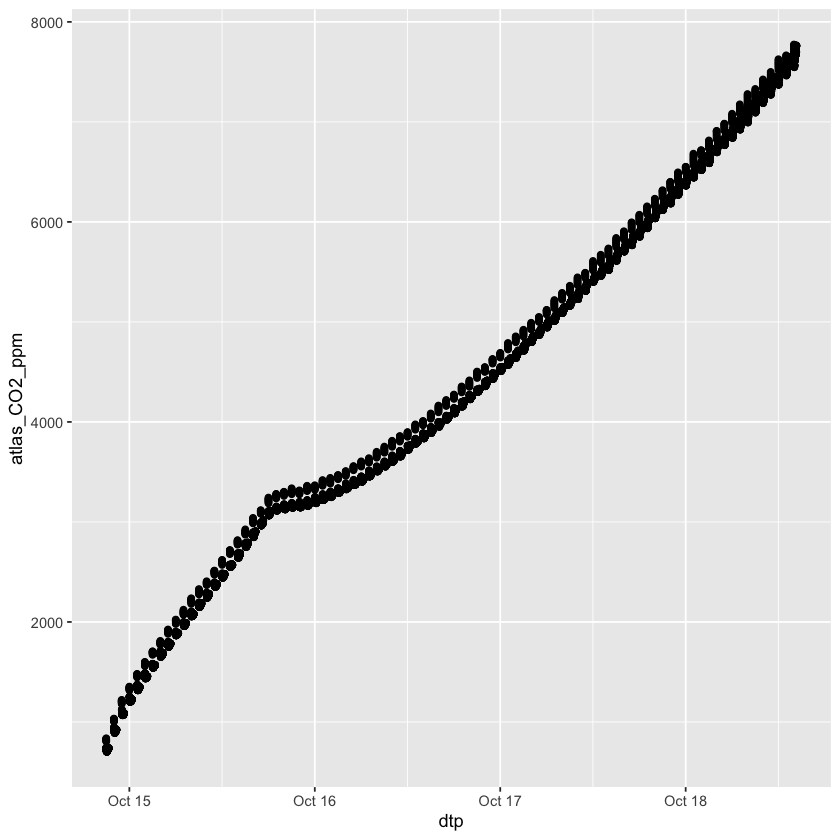

In [29]:
ggplot(comp_data,aes(dtp,atlas_CO2_ppm))+
       geom_point()

In [92]:
head(comp_data,n=100)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval,group,burstcount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<drtn>,<dbl>,<dbl>
1,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781215,2022-10-14 21:00:14.741,1790,22.0,⋯,0,1359,0,NA,NA,1665781214.741,2022-10-14 21:00:14,NA secs,1,1
2,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781217,2022-10-14 21:00:16.740,1646,22.0,⋯,0,1347,0,NA,NA,1665781216.74,2022-10-14 21:00:16,1.999 secs,1,1
3,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781219,2022-10-14 21:00:18.743,1621,22.0,⋯,0,1334,0,NA,NA,1665781218.743,2022-10-14 21:00:18,2.003 secs,1,2
4,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781221,2022-10-14 21:00:20.750,1615,21.7,⋯,0,1326,0,NA,NA,1665781220.75,2022-10-14 21:00:20,2.007 secs,1,3
5,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781223,2022-10-14 21:00:22.749,1630,21.7,⋯,0,1327,0,NA,NA,1665781222.749,2022-10-14 21:00:22,1.999 secs,1,4
6,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781225,2022-10-14 21:00:24.752,1631,21.7,⋯,0,1332,0,NA,NA,1665781224.752,2022-10-14 21:00:24,2.003 secs,1,5
7,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781227,2022-10-14 21:00:26.819,1632,21.7,⋯,0,1344,0,NA,NA,1665781226.819,2022-10-14 21:00:26,2.067 secs,1,6
8,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781229,2022-10-14 21:00:28.818,1627,21.7,⋯,0,1355,0,NA,NA,1665781228.818,2022-10-14 21:00:28,1.999 secs,1,7
9,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781231,2022-10-14 21:00:30.821,1627,21.7,⋯,0,1369,0,NA,NA,1665781230.821,2022-10-14 21:00:30,2.003 secs,1,8


In [81]:
head(comp_data,n=100)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval,group
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<drtn>,<dbl>
1,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781215,2022-10-14 21:00:14.741,1790,22.00,⋯,2004.0,0,1359.0,0,NA,NA,1665781214.741,2022-10-14 21:00:14,NA secs,1
2,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781217,2022-10-14 21:00:16.740,1646,22.00,⋯,2005.0,0,1347.0,0,NA,NA,1665781216.74,2022-10-14 21:00:16,1.999000e+00 secs,1
3,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781219,2022-10-14 21:00:18.743,1621,22.00,⋯,2005.0,0,1334.0,0,NA,NA,1665781218.743,2022-10-14 21:00:18,2.003000e+00 secs,1
4,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781221,2022-10-14 21:00:20.750,1615,21.70,⋯,2003.0,0,1326.0,0,NA,NA,1665781220.75,2022-10-14 21:00:20,2.007000e+00 secs,1
5,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781223,2022-10-14 21:00:22.749,1630,21.70,⋯,2004.0,0,1327.0,0,NA,NA,1665781222.749,2022-10-14 21:00:22,1.999000e+00 secs,1
6,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781225,2022-10-14 21:00:24.752,1631,21.70,⋯,2005.0,0,1332.0,0,NA,NA,1665781224.752,2022-10-14 21:00:24,2.003000e+00 secs,1
7,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781227,2022-10-14 21:00:26.819,1632,21.70,⋯,2004.0,0,1344.0,0,NA,NA,1665781226.819,2022-10-14 21:00:26,2.067000e+00 secs,1
8,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781229,2022-10-14 21:00:28.818,1627,21.70,⋯,2004.0,0,1355.0,0,NA,NA,1665781228.818,2022-10-14 21:00:28,1.999000e+00 secs,1
9,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781231,2022-10-14 21:00:30.821,1627,21.70,⋯,2004.0,0,1369.0,0,NA,NA,1665781230.821,2022-10-14 21:00:30,2.003000e+00 secs,1
